# Analysis and Visualisation of Dengue Virus Sequence Reads


### Short Introduction

This Jupyter notebook is an account of the coding, analyses and visualisations done using the sequence reads of dengue virus (DENV) provided by Marlene and Vincent. Jupiter notebooks use IPython, a markdown version of the Python programming language, which allows the simultaneous execution and presentation of the code performing the analyses alongside the output of this analyses in the form of tables, values of graphs. It also allows the addition of formatted text and headings like the ones here.

The following page contains a combination of scripting code, analysis output and comments in the form of formatted text. The code will always appear in 'cells', while the output and the comments/explanations will be outside these cells. The output may be in the form of text, numbers, figures or tables. In general the output may not always be highly exciting. Some outputs are a step that helps to produce later more important ones. We have added comments and explanations under the bits of output, which we believe, are of interest and potentially need explanation, clarification or discussion.

.


.

In [24]:
exec (open("/Users/markov/dengue/scripts/functions.py").read ())
refgenome_file = "/Users/markov/dengue/data/pDVWSK601-NGC virus.gb"
#getting_cover_ntfreqs ("/Users/pvmarkov/dengue/data/reads_subset.bam", "/Users/markov/dengue/data/denv_coverage_and_ntcounts_nopairs_noquality_subset.csv", False, False)
#getting_cover_ntfreqs ("/Users/markov/dengue/data/twoway_noadapt6_rehead_sortindex.bam", "/Users/markov/dengue/data/denv_coverage_and_ntcounts_nopairs_noquality.csv", False, False)
#getting_cover_ntfreqs ("/Users/markov/dengue/data/twoway_noadapt6_rehead_sortindex.bam", "/Users/markov/dengue/data/denv_coverage_n_ntcounts_paircheck_on_qualitycontrol_on.csv", True, True)

In [25]:
counts_dataframe = pd.read_csv ("/Users/markov/dengue/data/denv_coverage_and_ntcounts_nopairs_noquality.csv")

correction = - getting_position_correction (refgenome_file, ''.join(counts_dataframe ['majorsequence']))
#print (correction)


16138


In [26]:
import sys
annotations = '/Users/markov/dengue/data/ref_geno_anottation_relabel.gff'

try:
    f= open (annotations, 'r')
except IOError:
    print ("Unknown file " + annotations)
    sys.exit()
    
line = ""
annots_list = list ()
line_list = list ()
for l in f:
    if ('CDS' in l or 'UTR' in l) and 'DEN2' not in l and 'Beta-lactamase' not in l:
        line_list = l.split()
        annots_list.append (make_annotation (line_list [12], line_list [3], line_list [4], correction))
#        print (l)
#        print (line_list)
annots_list.sort (key=lambda x: x.start)
print ('The annotations and their positions are: \n',annots_list)
#print (annots_list [0].name)
#print (annots_list [0].start)
            

f.close()

The annotations and their positions are: 
 [5UTR: 1 to 96, "Capsid": 97 to 438, "SP\prM": 397 to 438, "prM": 439 to 936, "M\(mature\form)": 712 to 936, E: 937 to 2421, "NS1": 2422 to 3477, "NS2A": 3478 to 4131, "NS2B": 4132 to 4521, "NS3": 4522 to 6375, "NS4A": 6376 to 6825, "NS4B": 6826 to 7569, "NS5": 7570 to 10272, 3UTR: 10273 to 10723]


/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


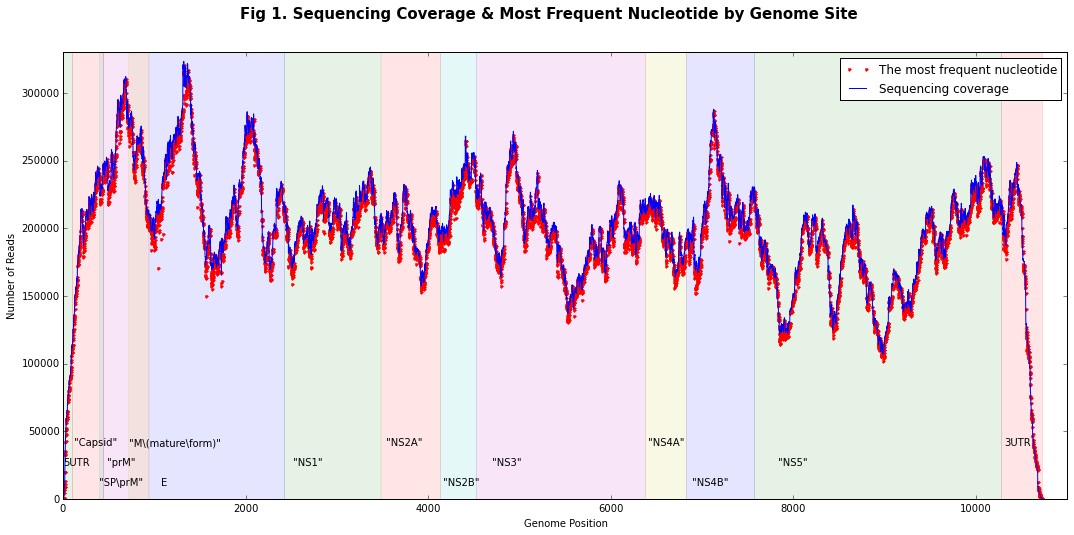

In [27]:

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Fig 1. Sequencing Coverage & Most Frequent Nucleotide by Genome Site', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], counts_dataframe ['majorbases'], 'r.') #(position, coverage, 'r-')
plt.plot (counts_dataframe ['position'], counts_dataframe ['As'] + counts_dataframe ['Cs'] + counts_dataframe ['Gs'] + counts_dataframe ['Ts'] + counts_dataframe ['Ns'], 'b-') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Reads')
plt.hlines(30, 7000, 9000, colors='r', linestyles='solid')
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['The most frequent nucleotide', 'Sequencing coverage'], loc = 'upper right')
axis_lower_limit = 0
axis_upper_limit = 330000
plt.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

__Figure 1 above shows__ the number of sequenced reads by genome position (we also call this sequencing coverage, or just coverage, blue line) and the number of reads that feature the most common nucleotide for this position. The colour bands indicate the spans of the various genes of the DENV coding sequence and the UTRs.


.

.

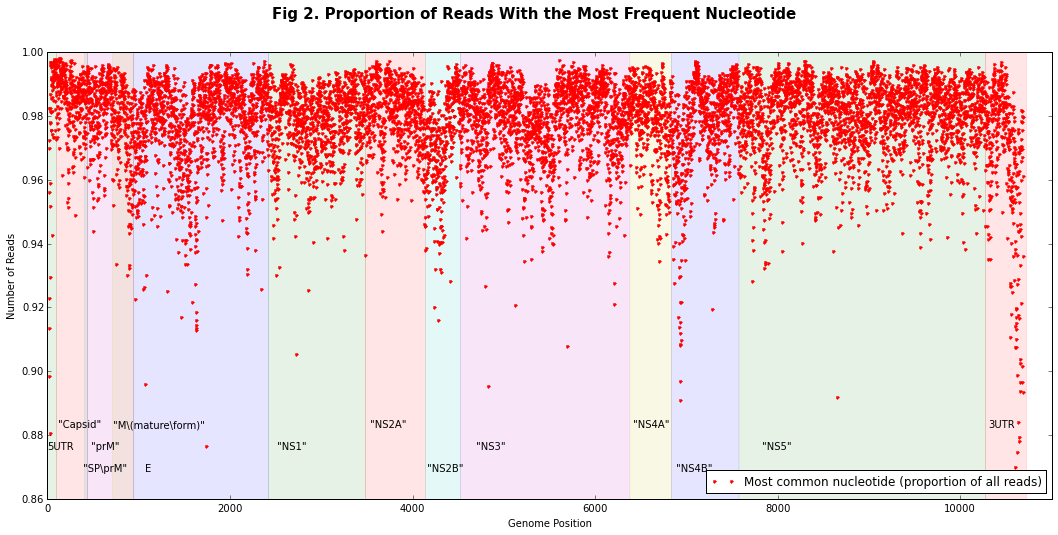

In [28]:
majorbase_ratio = list ()
coverage = counts_dataframe ['As'] + counts_dataframe ['Cs'] + counts_dataframe ['Gs'] + counts_dataframe ['Ts'] + counts_dataframe ['Ns']
majorbases = counts_dataframe ['majorbases']
for x in range (len(coverage)):
    majorbase_ratio.append (majorbases [x]/coverage[x])
    
def ratio(x,y):
    return x/y

majorbase_ratio = list(map(ratio, majorbases, coverage))

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], majorbase_ratio, 'r.') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Reads')
fig_size = rcParams["figure.figsize"]
plt.suptitle('Fig 2. Proportion of Reads With the Most Frequent Nucleotide', fontsize=15, fontweight='bold')
plt.legend (['Most common nucleotide (proportion of all reads)', 'coverage'], loc = 'lower right')
axis_lower_limit = 0.86
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)

__Figure 2 above shows__  the proportion reads that feature the most common nucleotide at this position. The proportion of reads with the most common nucleotide is a measure of the degree of polymorphism at the respective site. The absolute number of reads that contain the prevailing nucleotide shown in figure 1, crucially depend on the sequencing coverage, which is highly variable site-to-site and is therefore not useful for comparison of polymorphism across different sites of the dengue virus genome. The proportion of reads with the majority nucleotide on the other hand allows comparisons across sites of the genome and more generally. Sites with low value of this proportion feature a larger share of 'other', less common nucleotides and are arguably less conserved than sites with high values - those that vary very little.

As in figure 1, colour bands indicate the different genes in the DENV open reading frame. Note that to emphasize the existing patterns, only part of the y-axis is shown in the figure. This means that even when the frequency of the most common nucleotide is at its lowest extreme, it is still above 0.86, i.e. the lower bound of the y-axis.

.

.

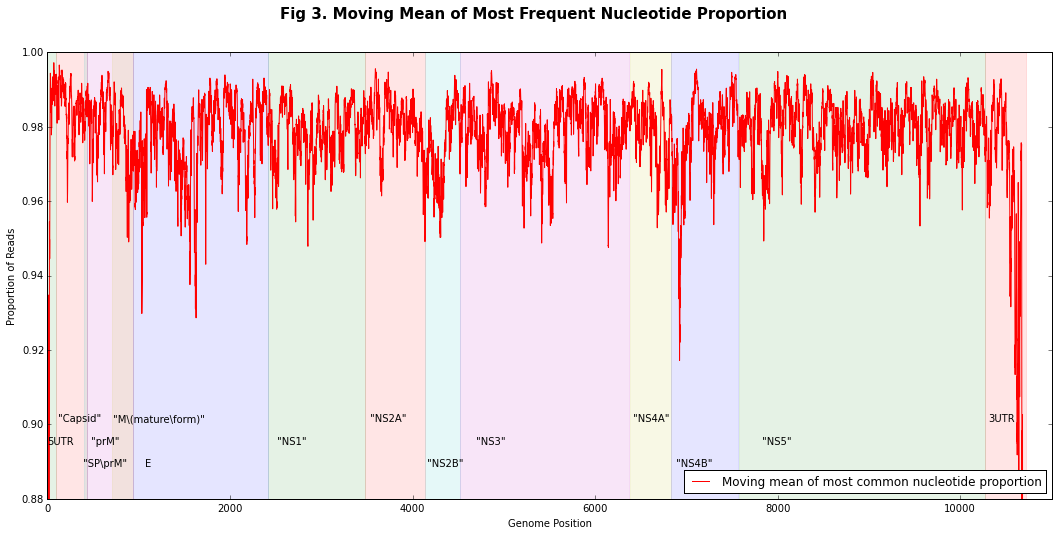

In [29]:
moving_average = (runningMeanFast (majorbase_ratio, 5))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Fig 3. Moving Mean of Most Frequent Nucleotide Proportion', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Proportion of Reads')
axis_lower_limit = 0.88
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)
#for gene in annots_list:
#    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
#    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
#    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['Moving mean of most common nucleotide proportion'], loc = 'lower right')
None

The graph in __Figure 3 above shows__ in essence the same information as Figure 2. The difference is that figure 3 uses the so-called moving average to smoothe the fluctuations a little, remove the far extremes and make the pattern easier to see. The genes and axes notations are the same as in figure 2.

The figure highlights specific regions with relatively higher polymorphism (the dips), particularly those in the beginning and middle of the envelope gene and one in the beginning of NS4B, and one in the (!!!) 3'UTR. Conversely it also highlights the most conserved parts of the genome, the peaks where sites feature the same nucleotide in ~99% of the reads.

.

.

"Capsid": 97 to 438
0.810026895659 2.27968991694
WilcoxonResult(statistic=2560.0, pvalue=0.058460375870483194)
WilcoxonResult(statistic=2471.0, pvalue=0.031777290505978717)
"SP\prM": 397 to 438
-0.57705910348 5.26457780573
WilcoxonResult(statistic=44.0, pvalue=0.91651190786389403)
WilcoxonResult(statistic=19.0, pvalue=0.064030148433023223)
"prM": 439 to 936
0.583363647043 -0.543766140067
WilcoxonResult(statistic=6335.0, pvalue=0.40436384445757068)
WilcoxonResult(statistic=6723.0, pvalue=0.83947484790036397)
"M\(mature\form)": 712 to 936
-0.190565317251 0.7922138366
WilcoxonResult(statistic=1373.0, pvalue=0.93773663830105769)
WilcoxonResult(statistic=1206.0, pvalue=0.32818150232015775)
E: 937 to 2421
-0.919104158254 -1.84103340266
WilcoxonResult(statistic=56863.0, pvalue=0.17862910037375979)
WilcoxonResult(statistic=53608.0, pvalue=0.017769529614537347)
"NS1": 2422 to 3477
-1.81005857432 -1.4378954571
WilcoxonResult(statistic=27744.0, pvalue=0.098398459992752554)
WilcoxonResult(statisti

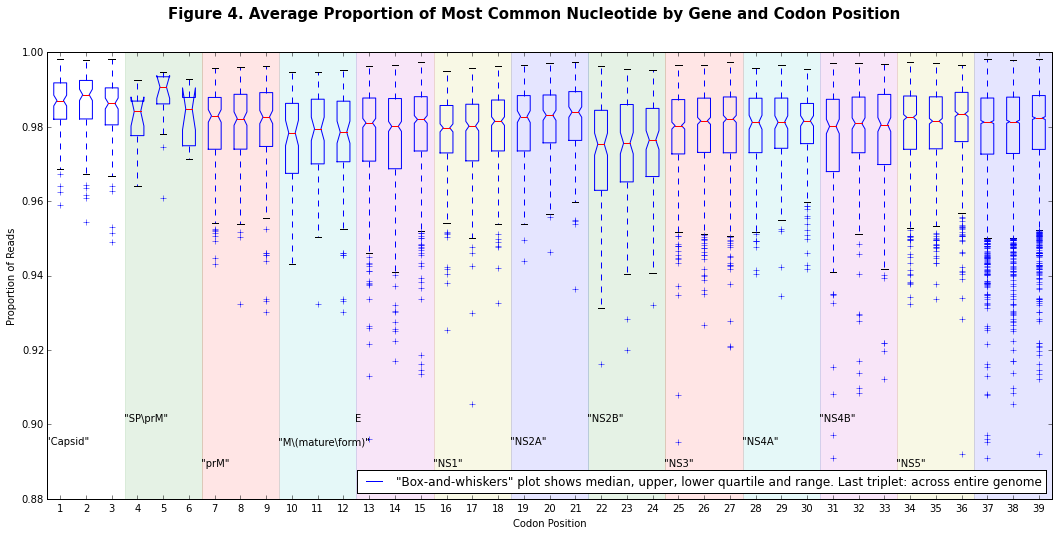

In [31]:
import scipy.stats
import statistics
geneslist = list() 
#print (len(majorbase_ratio))
#list1, list2, list3 = determin_codon_posit(x, majorbase_ratio)
global_list1 = list()
global_list2 = list()
global_list3 = list()
for x in annots_list:
    if x.start>0 and x.end< len(majorbase_ratio) and 'UTR' not in x.name:
        list1, list2, list3 = determin_codon_posit(x, majorbase_ratio) # provides three lists of majorbase_ratio values for positions 1, 2 and 3 over the length of segment x
        geneslist.append (list1) # these three commands create list of lists... 
        geneslist.append (list2) # ...created by appending list of values for codon position1, then 2, then 3 for each gene in turn...
        geneslist.append (list3) # ...as the loop goes through members of annots_list
        list1_pruned = list1[0:-1] 
        list2_pruned = list2[0:-1]
        global_list1.extend(list1_pruned) # these three create a list of values for...
        global_list2.extend(list2_pruned) # ... codon positions 1, 2 and 3 throughout...
        global_list3.extend(list3)        # ... the entire genome.
        print (x)
        print ((statistics.median(list1_pruned) - statistics.median (list3))*1000, (statistics.median (list2_pruned) - statistics.median (list3))*1000)
        print (scipy.stats.wilcoxon (list1_pruned, list3)) # Wilcoxon signed rank test on position 1 vs. position 3...
        print (scipy.stats.wilcoxon (list2_pruned, list3)) # ...and pos2 vs. pos3 gene by gene

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.xlabel ('Codon Position')
plt.ylabel ('Proportion of Reads')
#plt.axis ([0, 11000, 0.8, 1])
print ("Across the genome")
print ((statistics.median(global_list1) - statistics.median (global_list3))*1000, (statistics.median (global_list2) - statistics.median (global_list3))*1000)
print (scipy.stats.wilcoxon (global_list1, global_list3)) # Wilcoxon signed rank test on position 1 vs. position 3...
print (scipy.stats.wilcoxon (global_list2, global_list3)) # ...and pos2 vs. pos3 over entire genome
print ('')
print ('')
geneslist.append (global_list1) # adds the list of all-genome lists in positions 1, 2 and 3 to...
geneslist.append (global_list2) # ...the list of lists 'genelist', used to do the...
geneslist.append (global_list3) # ... boxplot below
plt.suptitle('Figure 4. Average Proportion of Most Common Nucleotide by Gene and Codon Position', fontsize=15, fontweight='bold')
axis_lower_limit = 0.88
plt.axis ([0, 39, axis_lower_limit, 1])
plt.boxplot(geneslist, 1)
plt.legend (['"Box-and-whiskers" plot shows median, upper, lower quartile and range. Last triplet: across entire genome'], loc = 'lower right')
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    if 'UTR' not in gene.name:
        #print (annots_list.index(gene))
        color_counter +=1
        plt.axvspan((annots_list.index(gene))*3 + 0.5, (annots_list.index(gene) + 1)*3 + 0.5, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
        plt.text ((annots_list.index(gene) - 1)*3 + 0.5, axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
        color += 1/len(annots_list)
None # this removes lots of unwanted output that matplotlib throws out.

__Figure 4__ presents averaged values of the proportion of the prevailing nucleotide for each gene, broken down by codon position. Within each gene (coloured band) there are three box plots - the first one presents the average statistics for all codon one positions in this gene, the second box plot presents statistics for all codon two positions and the third one - for all codon threes. The box plots in far right band represents the average for the three codon positions but across the entire genome (not gene by gene). Within each box plot the red line is the median value for that codon, the two ends of the box are the upper and lower quartile and the dashes either way of the boxes are the range.

Due to the degeneracy of the amino acid code, only substitutions at third positions in the codon can be synonymous. This predicts that on average codon position 3 should be more diverse across the alignment as there is less constraint on it to vary. We have therefore done this analysis to check if third codon positions may have lower average frequencies of the most common nucleotide. This does not seem to be the case very much judging from the graph. This part of the analysis is a pilot and is not yet properly tested, so the actual result may change after reanalysis.

The output above the figure presents only preliminary results from the Wilcoxon Signed Rank test, testing the statistical significance of the difference in frequencies at position 3 from positions 1 and 2.


.

.